Score Category 0:
R1    160.128
G1    164.224
B1    166.528
R2    115.840
G2    121.984
B2    119.104
R3    121.088
G3    127.488
B3    124.672
Name: 0, dtype: float64


Score Category 1:
R1    162.816
G1    168.576
B1    169.216
R2    119.424
G2    124.672
B2    117.952
R3    108.224
G3    113.536
B3    104.384
Name: 1, dtype: float64


Score Category 2:
R1    157.120
G1    163.840
B1    162.048
R2    122.624
G2    129.408
B2    118.912
R3    110.848
G3    117.440
B3    105.216
Name: 2, dtype: float64


Score Category 3:
R1    165.248
G1    170.432
B1    167.424
R2    113.600
G2    119.808
B2    105.920
R3    110.592
G3    117.248
B3    101.888
Name: 3, dtype: float64


Score Category 4:
R1    161.728
G1    167.488
B1    162.112
R2    112.704
G2    119.168
B2    102.336
R3    104.832
G3    111.040
B3     92.736
Name: 4, dtype: float64


Score Category 5:
R1    157.440
G1    162.752
B1    156.544
R2    113.152
G2    120.000
B2    102.592
R3    109.888
G3    117.120
B3     96.000
Name: 

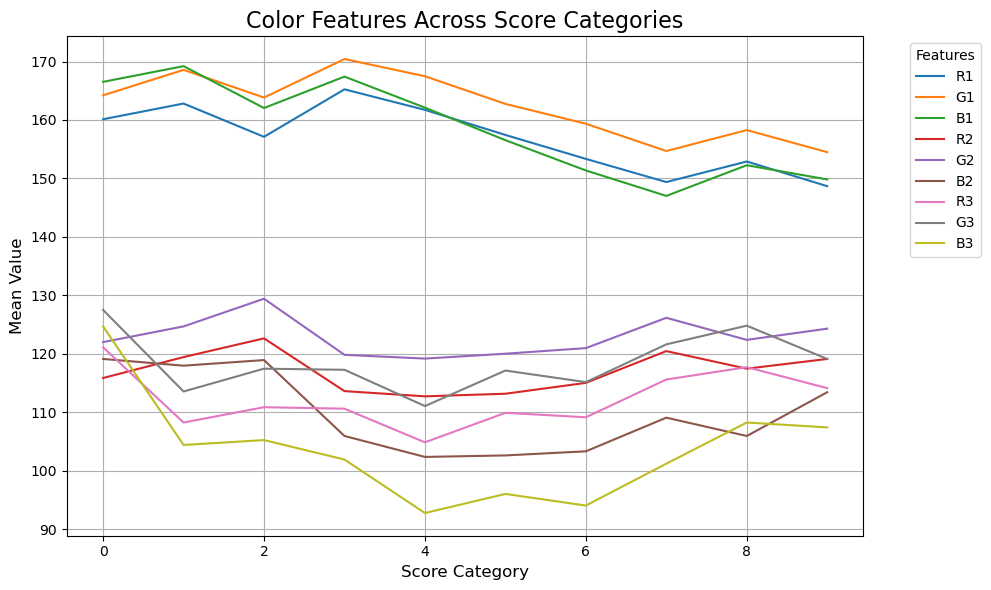

In [15]:
import pandas as pd
from collections import Counter
import os

# Read the score data
df_scores = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/scenicornot.metadata.csv')

# Read the color feature data (color space features: H_mean, S_mean, V_mean, etc.)
df_colors = pd.read_csv('/home/ubuntu/landscape-aesthetics/reports/dominant_colors_hist_8.csv')  # Change to the path of your color feature file

# Assume the first column in df_scores is the image name and the 8th column is the score
df_scores = df_scores[['filename', 'average']]  # Extract the columns for image names and scores

# Divide the scores into 10 equal-frequency intervals
df_scores['score_category'] = pd.qcut(df_scores['average'], q=10, labels=False)

df_colors['filename_extracted'] = df_colors['image_path'].apply(os.path.basename)
df_scores['filename_extracted'] = df_scores['filename'].apply(os.path.basename)

# Merge the two dataframes based on the image name
df_merged = pd.merge(df_scores, df_colors, left_on='filename_extracted', right_on='filename_extracted')

# Calculate the mean of each color space feature per score category
color_features = ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']

mean_colors_by_category = df_merged.groupby('score_category')[color_features].mean()

# Output the mean values of the color features for each score category
for category in mean_colors_by_category.index:
    print(f"Score Category {category}:")
    print(mean_colors_by_category.loc[category])
    print("\n")

# Visualize the color features for each score category
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in color_features:
    plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)

plt.title('Color Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation between color features and score:
color_std   -0.117361
average      1.000000
Name: average, dtype: float64


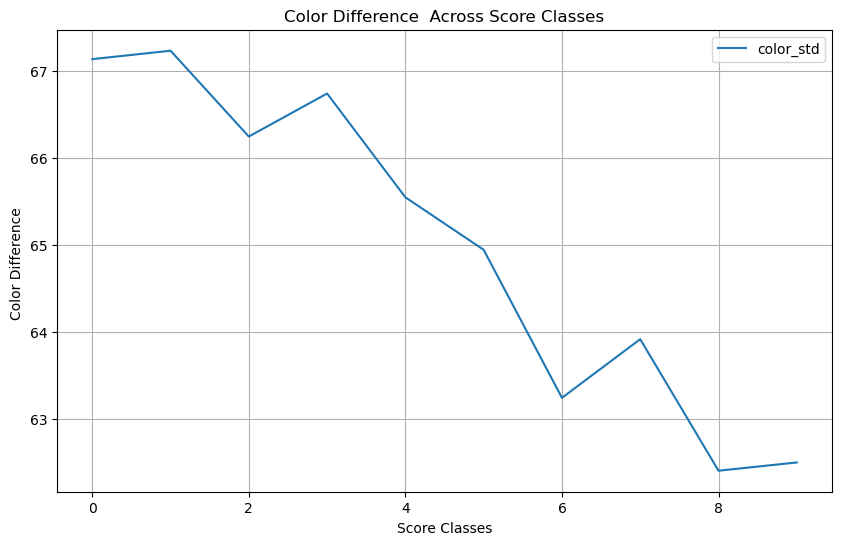

In [16]:
# df_merged['mean_R'] = df_merged[['R1', 'R2', 'R3']].mean(axis=1)
# df_merged['mean_G'] = df_merged[['G1', 'G2', 'G3']].mean(axis=1)
# df_merged['mean_B'] = df_merged[['B1', 'B2', 'B3']].mean(axis=1)
# df_merged['color_std'] = df_merged[['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8']].std(axis=1)
df_merged['color_std'] = df_merged[['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8']].std(axis=1)


color_features_2 = ['color_std', 'average']

correlation_matrix = df_merged[color_features_2].corr()
print("Correlation between color features and score:")
print(correlation_matrix['average'])

mean_colors_by_category_2 = df_merged.groupby('score_category')[['color_std']].mean()

mean_colors_by_category_2.plot(kind='line', figsize=(10, 6))
plt.title('Color Difference  Across Score Classes')
plt.xlabel('Score Classes')
plt.ylabel('Color Difference ')
plt.grid(True)
plt.savefig(f"/home/ubuntu/landscape-aesthetics/reports/figures/Color Difference  Across Score Classes.jpg")
plt.show()


In [11]:
import webcolors

css3_hex_to_names = {
    '#E41A1C': 'Red',
    '#377EB8': 'Blue',
    '#4DAF4A': 'Green',
    '#984EA3': 'Purple',
    '#FF7F00': 'Orange',
    '#FFFF33': 'Yellow',
    '#A65628': 'Brown',
    '#F781BF': 'Pink',
    '#66C2A5': 'Teal',
    '#FC8D62': 'Light Red',
    '#8DA0CB': 'Light Blue',
    '#E78AC3': 'Light Pink',
    '#A6D854': 'Light Green',
    '#FFD92F': 'Bright Yellow',
    '#E5C494': 'Tan',
    '#1B9E77': 'Dark Teal',
    '#D95F02': 'Dark Orange',
    '#7570B3': 'Dark Purple',
    '#E7298A': 'Dark Pink',
    '#66A61E': 'Olive Green',
    '#E6AB02': 'Mustard',
    '#A6761D': 'Dark Brown',
    '#FF69B4': 'Hot Pink',
    '#5F9EA0': 'Cadet Blue',
    '#D2691E': 'Chocolate',
    '#FF4500': 'Orange Red',
    '#DA70D6': 'Orchid',
    '#B22222': 'Firebrick',
    '#4682B4': 'Steel Blue',
    '#32CD32': 'Lime Green',
    '#9400D3': 'Dark Violet',
    '#FFD700': 'Gold',
    '#20B2AA': 'Light Sea Green',
    '#FF6347': 'Tomato',
    '#7B68EE': 'Medium Slate Blue'
}

def get_closest_color_name(r, g, b):
    min_colors = {}
    for hex_code, name in css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_code)
        rd = (r_c - r) ** 2
        gd = (g_c - g) ** 2
        bd = (b_c - b) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_color_name(r, g, b):
    try:
        return webcolors.rgb_to_name((int(r), int(g), int(b)))
    except ValueError:
        return get_closest_color_name(r, g, b)

# Get dominant color names for each score category
dominant_color_names = {}

for category in mean_colors_by_category.index:
    dominant_colors = []
    for i in range(1, 9):  # For R1,G1,B1; R2,G2,B2; R3,G3,B3
        r, g, b = mean_colors_by_category[f'R{i}'][category], mean_colors_by_category[f'G{i}'][category], mean_colors_by_category[f'B{i}'][category]
        color_name = get_color_name(r, g, b)
        dominant_colors.append(color_name)
    dominant_color_names[category] = dominant_colors
    print(f"Score Category {category}: Dominant Colors - {dominant_colors}")


Score Category 0: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Cadet Blue', 'Cadet Blue', 'Cadet Blue', 'Cadet Blue', 'Cadet Blue', 'Cadet Blue']
Score Category 1: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Cadet Blue', 'Green', 'Green', 'Cadet Blue', 'Green', 'Cadet Blue']
Score Category 2: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green']
Score Category 3: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green']
Score Category 4: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green']
Score Category 5: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green']
Score Category 6: Dominant Colors - ['Light Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green']
Score Category 7: Dominant Colors - ['Cadet Blue', 'Cadet Blue', 'Green', 'Green', 'Green', 'Green', 'Green', 'Green'

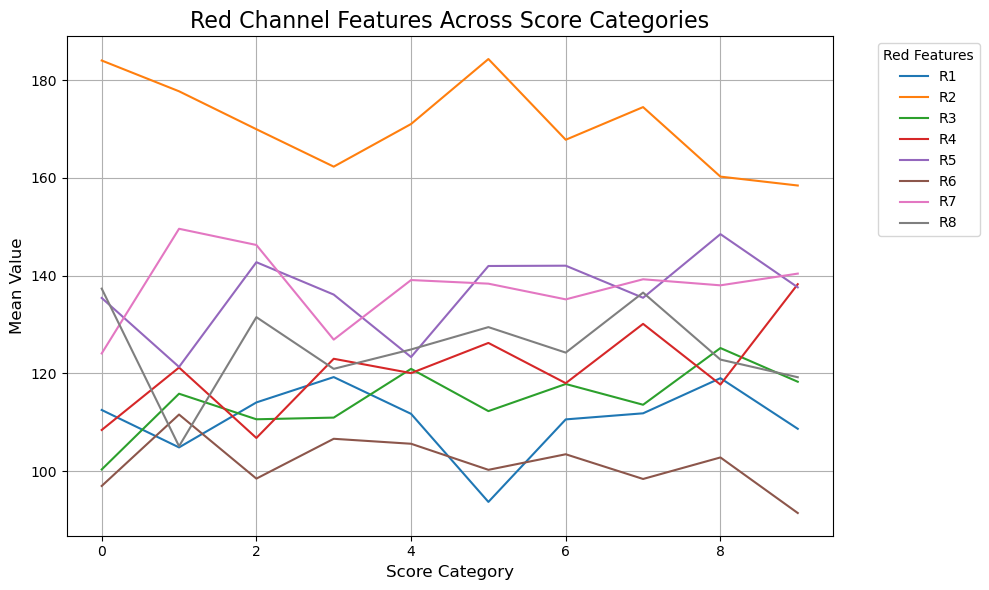

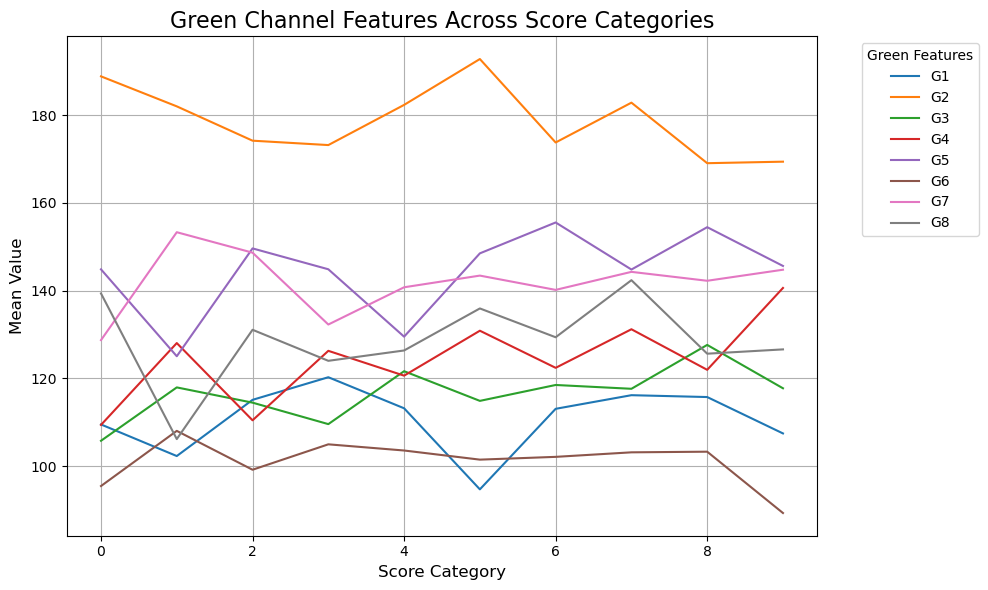

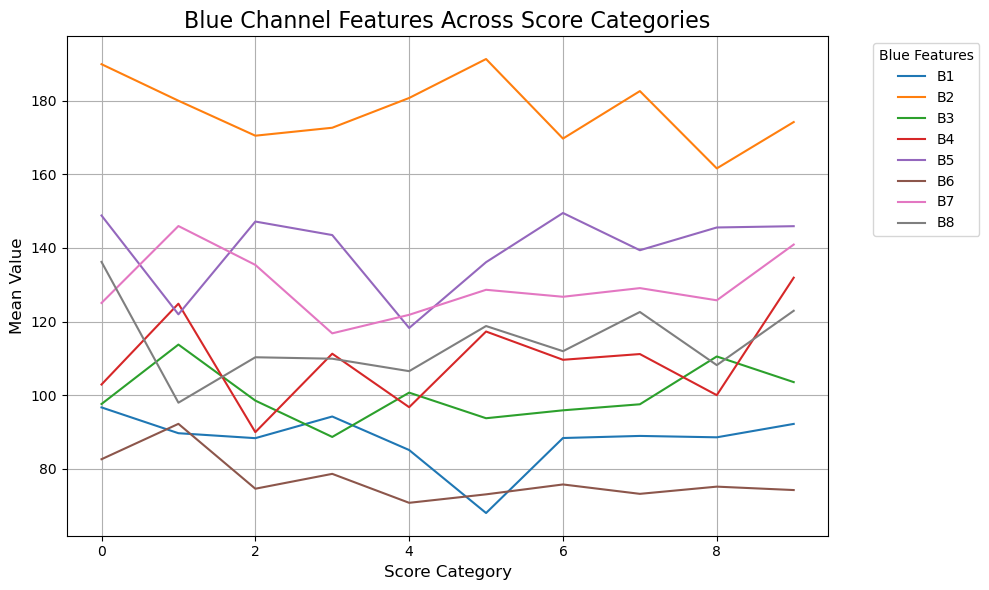

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_scores = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/scenicornot.metadata.csv')

df_colors = pd.read_csv('/home/ubuntu/landscape-aesthetics/reports/dominant_colors_8.csv')

df_scores = df_scores[['filename', 'average']]

df_scores['score_category'] = pd.qcut(df_scores['average'], q=10, labels=False)

df_colors['filename_extracted'] = df_colors['image_path'].apply(os.path.basename)
df_scores['filename_extracted'] = df_scores['filename'].apply(os.path.basename)

df_merged = pd.merge(df_scores, df_colors, left_on='filename_extracted', right_on='filename_extracted')

color_features = ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 
                  'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8']

mean_colors_by_category = df_merged.groupby('score_category')[color_features].mean()


R_features = [col for col in color_features if col.startswith('R')]
G_features = [col for col in color_features if col.startswith('G')]
B_features = [col for col in color_features if col.startswith('B')]

plt.figure(figsize=(10, 6))
for feature in R_features:
    plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)
plt.title('Red Channel Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Red Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for feature in G_features:
    plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)
plt.title('Green Channel Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Green Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for feature in B_features:
    plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)
plt.title('Blue Channel Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Blue Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
